In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Laad de data
df = pd.read_csv('../data/raw/transactions.csv', 
                 sep=',',
                 encoding='latin-1',
                 quotechar='"',
                 skipinitialspace=True)

print("="*60)
print("RAW DATA LOADED")
print("="*60)
print(f"Shape: {df.shape}")
print(f"Date range: {df['Datum'].min()} to {df['Datum'].max()}")
print(f"\nFirst few rows:")
print(df.head(3))

Matplotlib is building the font cache; this may take a moment.


RAW DATA LOADED
Shape: (1638, 26)
Date range: 2024-12-08 to 2025-12-08

First few rows:
            IBAN/BBAN Munt       BIC  Volgnr       Datum  Rentedatum   Bedrag  \
0  NL38RABO0326065938  EUR  RABONL2U    4976  2024-12-08  2024-12-08  +100,00   
1  NL38RABO0326065938  EUR  RABONL2U    4977  2024-12-08  2024-12-08  +100,00   
2  NL38RABO0326065938  EUR  RABONL2U    4978  2024-12-08  2024-12-08   -25,00   

  Saldo na trn Tegenrekening IBAN/BBAN        Naam tegenpartij  ...  \
0      +105,36      NL92RABO3031660358           J.W. Croymans  ...   
1      +205,36      NL92RABO3031660358           J.W. Croymans  ...   
2      +180,36                     NaN  CCV*Cuijkse Brouwbriga  ...   

  Machtigingskenmerk Incassant ID Betalingskenmerk            Omschrijving-1  \
0                NaN          NaN              NaN                             
1                NaN          NaN              NaN                             
2                NaN          NaN              NaN  CUYK, 5432

In [2]:
print("="*60)
print("DATA TYPES & NULL VALUES")
print("="*60)
print(df.dtypes)
print("\n" + "="*60)
print("MISSING VALUES")
print("="*60)
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

DATA TYPES & NULL VALUES
IBAN/BBAN                     object
Munt                          object
BIC                           object
Volgnr                         int64
Datum                         object
Rentedatum                    object
Bedrag                        object
Saldo na trn                  object
Tegenrekening IBAN/BBAN       object
Naam tegenpartij              object
Naam uiteindelijke partij     object
Naam initiërende partij       object
BIC tegenpartij               object
Code                          object
Batch ID                      object
Transactiereferentie          object
Machtigingskenmerk            object
Incassant ID                  object
Betalingskenmerk             float64
Omschrijving-1                object
Omschrijving-2                object
Omschrijving-3               float64
Reden retour                 float64
Oorspr bedrag                 object
Oorspr munt                   object
Koers                         object
dtype: object

In [3]:
print("="*60)
print("FIXING BEDRAG (AMOUNT) COLUMN")
print("="*60)

# Bekijk originele waarden
print("Original Bedrag samples:")
print(df['Bedrag'].head(10))
print(f"\nData type: {df['Bedrag'].dtype}")

# Fix: verwijder '+', vervang ',' door '.', converteer naar float
df['Bedrag_Clean'] = df['Bedrag'].str.replace('+', '', regex=False)
df['Bedrag_Clean'] = df['Bedrag_Clean'].str.replace(',', '.', regex=False)
df['Bedrag_Clean'] = pd.to_numeric(df['Bedrag_Clean'], errors='coerce')

print("\n✅ Cleaned Bedrag samples:")
print(df['Bedrag_Clean'].head(10))
print(f"\nData type: {df['Bedrag_Clean'].dtype}")

# Check for conversion errors
errors = df[df['Bedrag_Clean'].isnull() & df['Bedrag'].notnull()]
if len(errors) > 0:
    print(f"\n⚠️ Warning: {len(errors)} values couldn't be converted")
else:
    print("\n✅ All values converted successfully!")

FIXING BEDRAG (AMOUNT) COLUMN
Original Bedrag samples:
0    +100,00
1    +100,00
2     -25,00
3    -100,00
4     -60,00
5      -1,74
6      -3,76
7    +390,09
8     -29,55
9     -39,70
Name: Bedrag, dtype: object

Data type: object

✅ Cleaned Bedrag samples:
0    100.00
1    100.00
2    -25.00
3   -100.00
4    -60.00
5     -1.74
6     -3.76
7    390.09
8    -29.55
9    -39.70
Name: Bedrag_Clean, dtype: float64

Data type: float64

✅ All values converted successfully!


In [4]:
print("="*60)
print("FIXING DATUM (DATE) COLUMN")
print("="*60)

# Bekijk originele waarden
print("Original Datum samples:")
print(df['Datum'].head(10))
print(f"Data type: {df['Datum'].dtype}")

# Converteer naar datetime
df['Datum_Clean'] = pd.to_datetime(df['Datum'], format='%Y-%m-%d', errors='coerce')

print("\n✅ Cleaned Datum samples:")
print(df['Datum_Clean'].head(10))
print(f"Data type: {df['Datum_Clean'].dtype}")

# Date range
print(f"\n📅 Date range:")
print(f"   From: {df['Datum_Clean'].min()}")
print(f"   To:   {df['Datum_Clean'].max()}")
print(f"   Days: {(df['Datum_Clean'].max() - df['Datum_Clean'].min()).days}")

FIXING DATUM (DATE) COLUMN
Original Datum samples:
0    2024-12-08
1    2024-12-08
2    2024-12-08
3    2024-12-08
4    2024-12-08
5    2024-12-09
6    2024-12-10
7    2024-12-11
8    2024-12-11
9    2024-12-11
Name: Datum, dtype: object
Data type: object

✅ Cleaned Datum samples:
0   2024-12-08
1   2024-12-08
2   2024-12-08
3   2024-12-08
4   2024-12-08
5   2024-12-09
6   2024-12-10
7   2024-12-11
8   2024-12-11
9   2024-12-11
Name: Datum_Clean, dtype: datetime64[ns]
Data type: datetime64[ns]

📅 Date range:
   From: 2024-12-08 00:00:00
   To:   2025-12-08 00:00:00
   Days: 365


In [5]:
print("="*60)
print("FIXING SALDO (BALANCE) COLUMN")
print("="*60)

print("Original Saldo samples:")
print(df['Saldo na trn'].head(10))

# Fix saldo (zelfde aanpak als bedrag)
df['Saldo_Clean'] = df['Saldo na trn'].str.replace('+', '', regex=False)
df['Saldo_Clean'] = df['Saldo_Clean'].str.replace(',', '.', regex=False)
df['Saldo_Clean'] = pd.to_numeric(df['Saldo_Clean'], errors='coerce')

print("\n✅ Cleaned Saldo samples:")
print(df['Saldo_Clean'].head(10))

# Check balance consistency
print("\nBalance check:")
print(f"Min: €{df['Saldo_Clean'].min():.2f}")
print(f"Max: €{df['Saldo_Clean'].max():.2f}")
print(f"Current: €{df['Saldo_Clean'].iloc[-1]:.2f}")

FIXING SALDO (BALANCE) COLUMN
Original Saldo samples:
0    +105,36
1    +205,36
2    +180,36
3     +80,36
4     +20,36
5     +18,62
6     +14,86
7    +404,95
8    +375,40
9    +335,70
Name: Saldo na trn, dtype: object

✅ Cleaned Saldo samples:
0    105.36
1    205.36
2    180.36
3     80.36
4     20.36
5     18.62
6     14.86
7    404.95
8    375.40
9    335.70
Name: Saldo_Clean, dtype: float64

Balance check:
Min: €-79.19
Max: €1795.96
Current: €38.57


In [6]:
print("="*60)
print("CHECKING FOR DUPLICATES")
print("="*60)

duplicates = df.duplicated(subset=['Datum', 'Bedrag', 'Naam tegenpartij', 'Omschrijving-1'])
print(f"Duplicate transactions: {duplicates.sum()}")

if duplicates.sum() > 0:
    print("\nDuplicate examples:")
    print(df[duplicates][['Datum', 'Bedrag', 'Naam tegenpartij', 'Omschrijving-1']].head())
    
    # Verwijder duplicaten
    df_clean = df.drop_duplicates(subset=['Datum', 'Bedrag', 'Naam tegenpartij', 'Omschrijving-1'], keep='first')
    print(f"\n✅ Removed {len(df) - len(df_clean)} duplicates")
    print(f"New shape: {df_clean.shape}")
else:
    df_clean = df.copy()
    print("✅ No duplicates found!")

CHECKING FOR DUPLICATES
Duplicate transactions: 7

Duplicate examples:
          Datum   Bedrag Naam tegenpartij Omschrijving-1
1    2024-12-08  +100,00    J.W. Croymans               
242  2025-02-09   +50,00    J.W. Croymans               
244  2025-02-09   +50,00    J.W. Croymans               
739  2025-05-31  +100,00    J.W. Croymans               
741  2025-05-31  +100,00    J.W. Croymans               

✅ Removed 7 duplicates
New shape: (1631, 29)


In [7]:
print("="*60)
print("FINANCIAL STATISTICS")
print("="*60)

# Income vs Expenses
income = df_clean[df_clean['Bedrag_Clean'] > 0]['Bedrag_Clean'].sum()
expenses = df_clean[df_clean['Bedrag_Clean'] < 0]['Bedrag_Clean'].sum()

print(f"Total Income:   €{income:,.2f}")
print(f"Total Expenses: €{expenses:,.2f}")
print(f"Net:            €{income + expenses:,.2f}")

print(f"\nTransaction counts:")
print(f"Income transactions:  {len(df_clean[df_clean['Bedrag_Clean'] > 0])}")
print(f"Expense transactions: {len(df_clean[df_clean['Bedrag_Clean'] < 0])}")

print(f"\nAverage transaction:")
print(f"Income:   €{df_clean[df_clean['Bedrag_Clean'] > 0]['Bedrag_Clean'].mean():,.2f}")
print(f"Expense:  €{df_clean[df_clean['Bedrag_Clean'] < 0]['Bedrag_Clean'].mean():,.2f}")

print(f"\nLargest transactions:")
print(f"Biggest income:  €{df_clean['Bedrag_Clean'].max():,.2f}")
print(f"Biggest expense: €{df_clean['Bedrag_Clean'].min():,.2f}")

FINANCIAL STATISTICS
Total Income:   €40,882.96
Total Expenses: €-41,549.75
Net:            €-666.79

Transaction counts:
Income transactions:  338
Expense transactions: 1293

Average transaction:
Income:   €120.96
Expense:  €-32.13

Largest transactions:
Biggest income:  €1,366.05
Biggest expense: €-1,500.00


✅ Visualization saved to: visualizations/01_initial_analysis.png


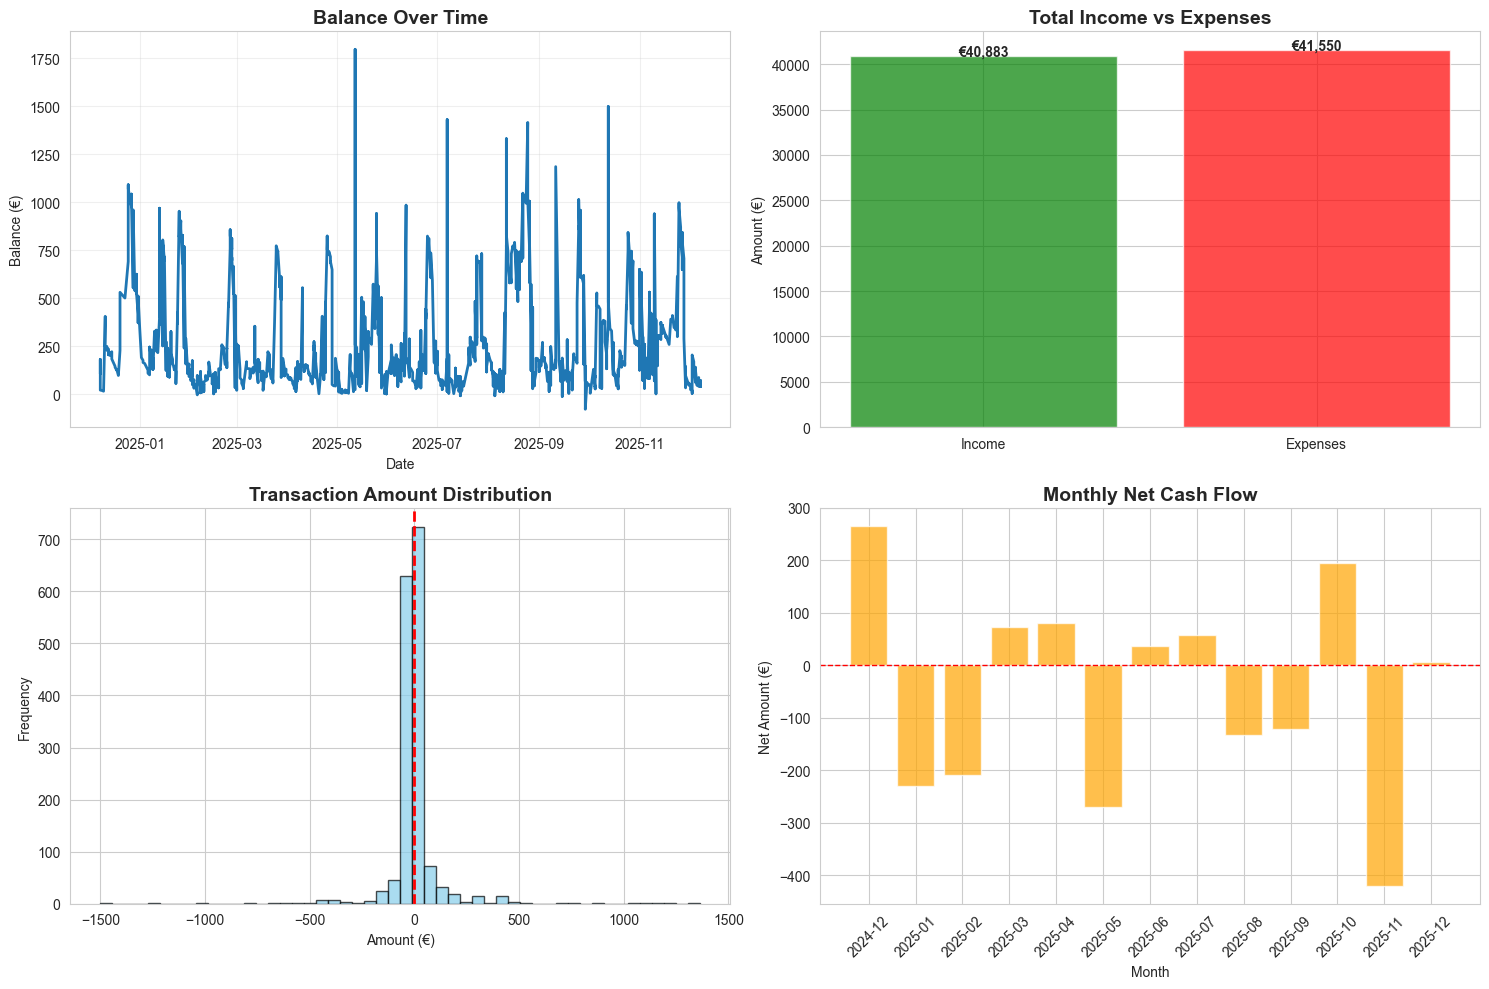

In [8]:
# 1. Income vs Expenses over time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Daily balance
df_clean_sorted = df_clean.sort_values('Datum_Clean')
axes[0, 0].plot(df_clean_sorted['Datum_Clean'], df_clean_sorted['Saldo_Clean'], linewidth=2)
axes[0, 0].set_title('Balance Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Balance (€)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Income vs Expenses
income_expenses = pd.DataFrame({
    'Type': ['Income', 'Expenses'],
    'Amount': [income, abs(expenses)]
})
axes[0, 1].bar(income_expenses['Type'], income_expenses['Amount'], color=['green', 'red'], alpha=0.7)
axes[0, 1].set_title('Total Income vs Expenses', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Amount (€)')
for i, v in enumerate(income_expenses['Amount']):
    axes[0, 1].text(i, v + 50, f'€{v:,.0f}', ha='center', fontweight='bold')

# Plot 3: Transaction amount distribution
axes[1, 0].hist(df_clean['Bedrag_Clean'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Transaction Amount Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Amount (€)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)

# Plot 4: Monthly spending
df_clean['Month'] = df_clean['Datum_Clean'].dt.to_period('M')
monthly = df_clean.groupby('Month')['Bedrag_Clean'].sum().reset_index()
monthly['Month_str'] = monthly['Month'].astype(str)
axes[1, 1].bar(monthly['Month_str'], monthly['Bedrag_Clean'], color='orange', alpha=0.7)
axes[1, 1].set_title('Monthly Net Cash Flow', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Net Amount (€)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.savefig('../visualizations/01_initial_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Visualization saved to: visualizations/01_initial_analysis.png")
plt.show()

In [9]:
print("="*60)
print("SAVING CLEANED DATA")
print("="*60)

# Selecteer relevante kolommen
df_final = df_clean[[
    'Datum_Clean', 
    'Bedrag_Clean', 
    'Saldo_Clean',
    'Naam tegenpartij',
    'Tegenrekening IBAN/BBAN',
    'Omschrijving-1',
    'Omschrijving-2',
    'Omschrijving-3',
    'Code'
]].copy()

# Hernoem kolommen
df_final.columns = [
    'Date', 
    'Amount', 
    'Balance',
    'Counterparty',
    'Counterparty_IBAN',
    'Description_1',
    'Description_2',
    'Description_3',
    'Code'
]

# Sorteer op datum
df_final = df_final.sort_values('Date').reset_index(drop=True)

# Save
df_final.to_csv('../data/processed/transactions_clean.csv', index=False)

print(f"✅ Saved cleaned data!")
print(f"   Shape: {df_final.shape}")
print(f"   Location: data/processed/transactions_clean.csv")
print(f"\nFinal dataset preview:")
print(df_final.head())

SAVING CLEANED DATA
✅ Saved cleaned data!
   Shape: (1631, 9)
   Location: data/processed/transactions_clean.csv

Final dataset preview:
        Date  Amount  Balance                       Counterparty  \
0 2024-12-08  100.00   105.36                      J.W. Croymans   
1 2024-12-08  -25.00   180.36             CCV*Cuijkse Brouwbriga   
2 2024-12-08 -100.00    80.36                      J.W. Croymans   
3 2024-12-08  -60.00    20.36  R. Pittens via Rabo Betaalverzoek   
4 2024-12-09   -1.74    18.62                  Albert Heijn 1382   

    Counterparty_IBAN                                      Description_1  \
0  NL92RABO3031660358                                                      
1                 NaN                           CUYK, 5432DR, NLD, 12:11   
2  NL92RABO3031660358                                                      
3  NL73RABO0325301433  NL32RABO0111648904 0022597627321876 R. Pittens...   
4                 NaN                          BREDA, 4817LR, NLD, 18:22  